In [67]:
from sklearn.datasets import make_classification

In [68]:
import numpy as np

In [69]:
X,Y=make_classification(n_samples=100,n_features=2,n_informative=2,n_redundant=0,random_state=103)

In [70]:
import matplotlib.pyplot as plt

In [71]:
Y[Y==0]=-1

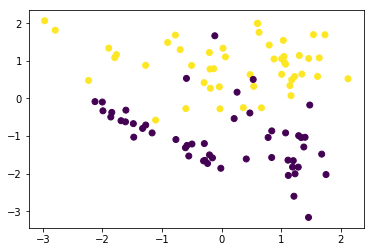

In [72]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [91]:
class SVM:
    def __init__(self,C=1.0):
        self.C=C
        self.W=0.0
        self.B=0.0
        
    def hingeloss(self,W,B,X,Y):
        loss=0.0
        m=X.shape[0]
        loss += 0.5*(np.dot(W,W.T))
        
        for i in range(m):
            ti= Y[i]*(np.dot(W,X[i].T+B))
            loss +=self.C*max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=20,learning_rate=0.001,max_itr=300):
        n_features=X.shape[1]
        n_samples=X.shape[0]
        n=learning_rate
        c=self.C
        # initializing parameters
        W=np.zeros((1,n_features))
        B=0.0
        
        print(self.hingeloss(W,B,X,Y))
        
        losses=[]
        
        for i in range(max_itr):
            l=self.hingeloss(W,B,X,Y)
            losses.append(l)
            ids=np.arange(n_samples)
            np.random.shuffle(ids)
            
            for batch_start in range(0,n_samples,batch_size):
                gradw=0
                gradb=0
                
                for j in range(batch_start,batch_size+batch_start):
                    if j<n_samples:
                        i=ids[j]
                        ti=Y[i]*(np.dot(W,X[i].T+B))
                        if ti>1:
                            gradw +=0
                            gradb +=0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                W= W - n*W + n*gradw
                B=B + n*gradb
                
        self.W = W
        self.B = B
        return W,B,losses    
    
                

In [92]:
mysvm=SVM()

In [93]:
W,B,losses=mysvm.fit(X,Y,max_itr=100)

100.0


In [94]:
print(losses[0])
print(losses[-1])

100.0
23.78470848984262


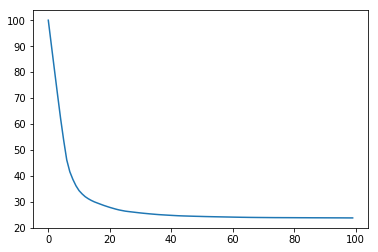

Final loss = 23.784708


In [103]:
plt.plot(losses)
plt.show()
print("Final loss = %f"%losses[-1])

In [96]:
W

array([[0.2373236 , 1.29237931]])

In [97]:
s=svm()

In [98]:
s.fit(X,Y)

100.0


In [104]:
def plotting(w1,w2,b):
    plt.figure(figsize=(6,6))
    x1=np.linspace(-3,2,10)
    x2=-((w1*x1)+b)/w2
    xp=-((w1*x1)+b-1)/w2
    xneg=-((w1*x1)+b+1)/w2
    
    plt.plot(x1,x2,label="Hyperplane WX+B=0")
    plt.plot(x1,xp,label="Hyperplane WX+B=1")
    plt.plot(x1,xneg,label="Hyperplane WX+B=-1")
    plt.legend()
    plt.scatter(X[:,0],X[:,1],c=Y)
    
    plt.show()
    

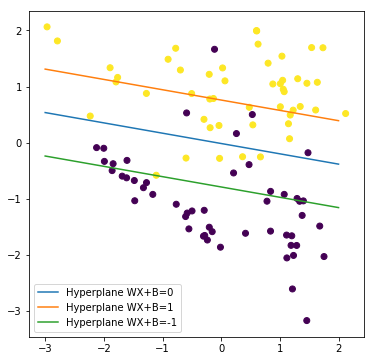

In [105]:
plotting(W[0][0],W[0][1],B)

In [115]:
ss=SVM(C=250)

In [116]:
w,b,losses=ss.fit(X,Y)

25000.0


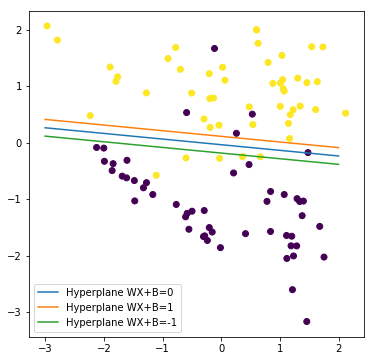

In [117]:
plotting(w[0][0],w[0][1],b)